# Time Series Linear Regression from scratch
### A small thing I thought was a big thing after it caught my attention at 1 AM
### Resources used:
- https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72
- https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=11s
- https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0

The linear regression style that will be implemented will be least mean squared, however gradiant decent is also an option I will explore

# Ordinary Least Mean Square:
Taking a look at the image below:
![Example](https://miro.medium.com/v2/resize:fit:856/format:webp/1*2LEjQZEKKYAqKHt8niVp2Q.png)

The line seen in the graph is the relationship between data that I want, we want to minimize the amount of error as much as possible, lines of best that pass through as many points as possible reduces error shown below in this image:
![Example2](https://miro.medium.com/v2/resize:fit:710/1*LxQraU40CdL9Qd9uSsq_xg.gif)

With the total error of the linear model being the sum of every error at each point:

$\sum_{i=1}^{n}r_{i}^2$

We need to square each of the distance's because some poitns will be above and below the line, we can minimize error in the linear model by minimizing **r** therefore we have:

$\beta_{i} = \frac{\sum_{i}(x_{i}-x)(y_{i}-y)}{\sum_{i}(x_{i}-x)^{2}}$

# Getting data:
I will not be using Numpy and will only use Pandas to get data and matplotlib to plot said data, nothing more will be used and everything else is implemented. **For our purposes I will be working with financial data using pandas data reader for Yahoo Finance**
We will also be using **only** the **Adj Close** column for our purposes, with the date serving as the x axis and Adj Close on the y

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
import math
from datetime import datetime
yf.pdr_override()
start = datetime(2020, 1, 1)
end = datetime(2023,1,1)

In [35]:
ticker = ["AAPL"]
aapl_data = pdr.get_data_yahoo(ticker, start,end)
print(aapl_data.shape)
aapl_data.head()

[*********************100%***********************]  1 of 1 completed
(756, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970100,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


In [36]:
ticker = ["SPY"]
spy_data = pdr.get_data_yahoo(ticker, start,end)
print(spy_data.shape)
spy_data.head()

[*********************100%***********************]  1 of 1 completed
(756, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,308.517456,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,306.181244,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,307.349396,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,306.485138,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,308.118622,68296000


#### We will first be performing OLS Regression and then move on to statistical testing:

In [37]:
X = spy_data['Adj Close'].values
Y = aapl_data['Adj Close'].values
print(X)
print(Y)

[308.51745605 306.1812439  307.34939575 306.48513794 308.11862183
 310.20779419 309.31524658 311.44241333 310.96755981 311.67034912
 314.26296997 315.24105835 314.6237793  314.66177368 315.02261353
 312.22116089 307.21640015 310.43585205 310.17932129 311.1859436
 305.53549194 307.80523682 312.496521   316.10531616 317.16888428
 315.47845459 317.83364868 318.38449097 320.4357605  320.09387207
 320.60665894 319.78048706 321.30941772 319.98937988 316.69403076
 306.19076538 296.91256714 295.82043457 282.53457642 281.3475647
 293.53173828 285.12719727 297.11196899 287.23547363 282.48718262
 260.42648315 273.90219116 260.54989624 235.62121582 255.76361084
 227.7769928  240.07514954 227.91944885 228.4037323  218.56088257
 212.97270203 232.26870728 235.74583435 249.51094055 242.07911682
 249.94081116 246.21531677 235.13442993 240.56028748 237.0831604
 253.00714111 253.26506042 261.76675415 265.75027466 263.32382202
 271.08999634 265.32980347 266.60992432 273.8125     268.98846436
 260.82113647

In [38]:
# Calculate mean manually:
def get_mean(data):
    sum = 0
    for item in data:
        sum+=item
    return sum / data.size

x_mean = get_mean(X)
y_mean = get_mean(Y)
n = X.size

# Calculate B1 and B0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean)**2
    
b1 = numerator/denominator
b0 = y_mean - (b1 * x_mean)
print(b1,b0)

0.5017460381879162 -59.116420757878046


In [39]:
# Lets plot these values using matplotlib

# Find max manually:
def get_max(data):
    max_item = 0
    for item in data:
        if item > max_item:
            max_item = item
    return max_item

# Find min manually:
def get_min(data):
    min_item = 0
    for item in data:
        if min_item > item:
            min_item = item
    return min_item

x_max = get_max(X)
x_min = get_min(X) + 200 # Adjusted for scaling

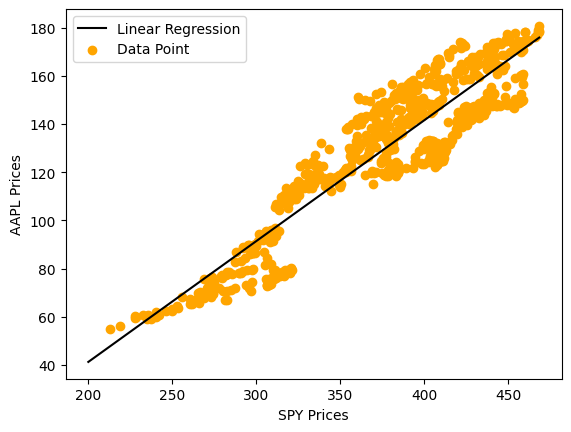

In [40]:
# For these purposes only we will use NumPy to get line spacing for graphing
import numpy as np
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

# Plotting the line
plt.plot(x,y,color='#000000',label='Linear Regression')
plt.scatter(X,Y,color='#FFA500',label='Data Point')
plt.xlabel('SPY Prices')
plt.ylabel('AAPL Prices')
plt.legend()
plt.show()

# Time to check our accuracy:
We will be using a coefficient of Determination score to determine this.

In [41]:
rmse = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    rmse += (Y[i] - y_pred)**2

rmse = math.sqrt(rmse/n)
print(rmse)

12.120868381312619


In [42]:
sum_of_squares = 0
sum_of_residuals = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    sum_of_squares += (Y[i] - y_mean)**2
    sum_of_residuals += (Y[i] - y_pred)**2
score = 1 - (sum_of_residuals/sum_of_squares)
print(score)

0.8446081436143399


In [43]:
# Residual Table:
residual_df = pd.DataFrame()
residuals = []
for i in range(n):
    y_pred = b0 + b1 * X[i]
    residuals.append((Y[i]-y_pred)**2)
residual_df.insert(0,'Residuals',residuals)
residual_df

,Residuals
0,494.244213
1,474.085283
2,474.370165
3,470.507401
4,455.266348
...,...
751,0.381588
752,2.856691
753,10.922065
754,9.791949


# Time to perform normality testing including:
- Jarque-Bera test
- Shapiro-Wilk test 

We will be using scipy for this

In [44]:
import scipy
from scipy import stats

# Normality
jb = stats.jarque_bera(residual_df)
sw = stats.shapiro(residual_df)
print(jb)
print(sw)

SignificanceResult(statistic=223.80266073750346, pvalue=2.5227237927849143e-49)
ShapiroResult(statistic=0.8483629822731018, pvalue=2.819279790587846e-26)
